In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/largest-art-museums/Largest-art-museums.csv


## Imporitng Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/largest-art-museums/Largest-art-museums.csv')

In [4]:
df

,Name,City,Country,Gallery space in m2 (sq ft),Gallery space in sq ft,Year established
0,British Museum,London,United Kingdom,"92,000","92,000 (990,000)",1753
1,Louvre,Paris,France,"72,735\r\n(782,910)","72,735\r\n(782,910)",1792
2,State Hermitage Museum,St. Petersburg,Russia,"66,842\r\n(719,480)","66,842\r\n(719,480)",1764
3,National Museum of China,Beijing,China,"65,000\r\n(700,000)","65,000\r\n(700,000)",1959
4,Metropolitan Museum of Art,New York City,United States,"58,820\r\n(633,100)","58,820\r\n(633,100)",1870
...,...,...,...,...,...,...
107,Museum Ludwig,Cologne,Germany,"8,000\r\n(86,000)","8,000\r\n(86,000)",1976
108,National Archaeological Museum,Athens,Greece,"8,000\r\n(86,000)","8,000\r\n(86,000)",1866
109,Neues Museum,Berlin,Germany,"8,000\r\n(86,000)","8,000\r\n(86,000)",1855
110,Petit Palais,Paris,France,"8,000\r\n(86,000)","8,000\r\n(86,000)",1902


## Data Cleaning

In [5]:
#Splitting Column 'Gallery space in m2'
df['Gallery space in m2'] = df['Gallery space in m2 (sq ft)'].str.split('(',expand=True)[0]

In [6]:
# Removing non-required characters 'Gallery space in m2'
replacements = [(',',""),('\r\n',"")]
for old,new in replacements:
    df['Gallery space in m2'] = df['Gallery space in m2'].str.replace(old,new,regex=False)

In [7]:
df.drop('Gallery space in m2 (sq ft)',axis=1,inplace=True)

In [8]:
#Spiltting column 'Gallery space in sq ft'
df['Gallery space in sq ft'] = df['Gallery space in sq ft'].str.split('(',expand=True)[1]

In [9]:
#Removing non-required Characters in 'Gallery space in sq ft'
replacements = [(',',""),(')',"")]
for old,new in replacements:
    df['Gallery space in sq ft'] = df['Gallery space in sq ft'].str.replace(old,new,regex=False)

In [10]:
df

,Name,City,Country,Gallery space in sq ft,Year established,Gallery space in m2
0,British Museum,London,United Kingdom,990000,1753,92000
1,Louvre,Paris,France,782910,1792,72735
2,State Hermitage Museum,St. Petersburg,Russia,719480,1764,66842
3,National Museum of China,Beijing,China,700000,1959,65000
4,Metropolitan Museum of Art,New York City,United States,633100,1870,58820
...,...,...,...,...,...,...
107,Museum Ludwig,Cologne,Germany,86000,1976,8000
108,National Archaeological Museum,Athens,Greece,86000,1866,8000
109,Neues Museum,Berlin,Germany,86000,1855,8000
110,Petit Palais,Paris,France,86000,1902,8000


**Removing Vakue with "/" in year.**

In [11]:
df['Year established'].unique()

array(['1753', '1792', '1764', '1959', '1870', '1819', '1506', '1872',
       '1964', '1852', '2020', '1891', '1900', '1909', '1879', '2006',
       '1937', '1999', '1835', '1912', '1977', '1965', '2015', '1883',
       '1806/1908', '2002', '2021', '1951', '1895', '1947', '1986',
       '1935', '1929', '1757', '1918', '1902', '2003', '1903', '1992',
       '1969', '1885', '2007', '1988', '1796', '1882', '1855', '1981',
       '1860', '1824', '1861', '2001', '1777', '1934', '2000', '1913',
       '1880', '1869', '1849', '1954', '1809', '1800', '1985', '1983',
       '1910', '1874', '1471', '1993', '1997', '1991', '2012', '1892',
       '1906', '1866', '1896', '1996', '1936', '2010', '2013', '1881',
       '1932', '1925', '1867', '1828', '1905', '1888', '1842', '1829',
       '1949', '2011', '1958', '1830', '2017', '1976'], dtype=object)

In [12]:
df[df['Year established']=='1806/1908']['Name']

25    Interdisciplinary Regional Museum of Messina
Name: Name, dtype: object

**Interdisciplinary Regional Museum of Messina first established in 1806.**

In [13]:
df['Year established'] = df['Year established'].replace( '1806/1908','1806')

In [14]:
df['Gallery space in m2'] = df['Gallery space in m2'].astype('float')

**Replacing None in dataframe.**

In [15]:
df['Gallery space in sq ft'].unique()

array(['990000', '782910', '719480', '700000', '633100', '513000',
       '460000', '410000', '360000', '330000', '317500', '312153',
       '300000', '291600', '280000', '260000', '271000', '249990',
       '240000', '221000', '214000', '212000', '199000', '190000',
       '188000', None, '183000', '180000', '181400', '170000', '166000',
       '160000', '159000', '158830', '152240', '150000', '146000',
       '145000', '143000', '142045', '140000', '211000', '136200',
       '135000', '133760', '133000', '129000', '130000', '126000',
       '120000', '117000', '113000', '112000', '111000', '110000',
       '103470', '100000', '98080', '97000', '96000', '95000', '94200',
       '93800', '91000', '89000', '86000'], dtype=object)

In [16]:
df.fillna(0,inplace=True)

In [17]:
df['Gallery space in sq ft'] = df['Gallery space in sq ft'].astype('float')

## Analyzing Data : Top Performing 

In [18]:
top_museums = df.sort_values('Gallery space in m2',ascending=False)
top_museums

,Name,City,Country,Gallery space in sq ft,Year established,Gallery space in m2
0,British Museum,London,United Kingdom,990000.0,1753,92000.0
1,Louvre,Paris,France,782910.0,1792,72735.0
2,State Hermitage Museum,St. Petersburg,Russia,719480.0,1764,66842.0
3,National Museum of China,Beijing,China,700000.0,1959,65000.0
4,Metropolitan Museum of Art,New York City,United States,633100.0,1870,58820.0
...,...,...,...,...,...,...
107,Museum Ludwig,Cologne,Germany,86000.0,1976,8000.0
108,National Archaeological Museum,Athens,Greece,86000.0,1866,8000.0
109,Neues Museum,Berlin,Germany,86000.0,1855,8000.0
110,Petit Palais,Paris,France,86000.0,1902,8000.0


In [19]:
top_counrty_gallery_area = top_museums.pivot_table(index='Country',values='Gallery space in m2',aggfunc=np.mean).sort_values('Gallery space in m2',ascending=False)
top_counrty_gallery_area

,Gallery space in m2
Country,
Vatican City,43000.000000
Russia,39421.000000
United Kingdom,37021.250000
Mexico,33000.000000
Austria,29000.000000
Japan,26000.000000
Ukraine,24000.000000
Belgium,22000.000000
Spain,18651.200000


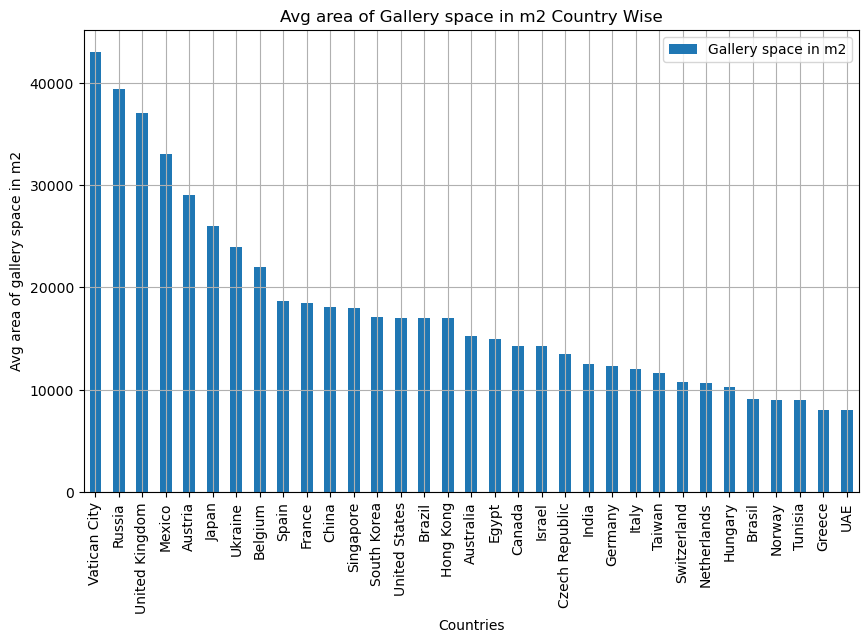

In [20]:
top_counrty_gallery_area.plot(kind = 'bar', xlabel = 'Countries', ylabel = 'Avg area of gallery space in m2', title = 'Avg area of Gallery space in m2 Country Wise', grid=True,figsize=(10,6))
plt.show()

<h3> Observation 1: <h3>
**Top perorming country according to mean area of museums is Vatican City, Russia, United Kingdom, Mexico, Austria , Japan,Ukraine, Belgium.**

In [21]:
top_country_museum_count = top_museums.pivot_table(index='Country',values='City',aggfunc=np.count_nonzero).sort_values('City',ascending=False)
top_country_museum_count.rename(columns={'City':'Number of Museums'},inplace = True)
top_country_museum_count

,Number of Museums
Country,
United States,25
Italy,11
France,9
Germany,9
China,8
Spain,5
United Kingdom,4
Canada,4
Taiwan,3


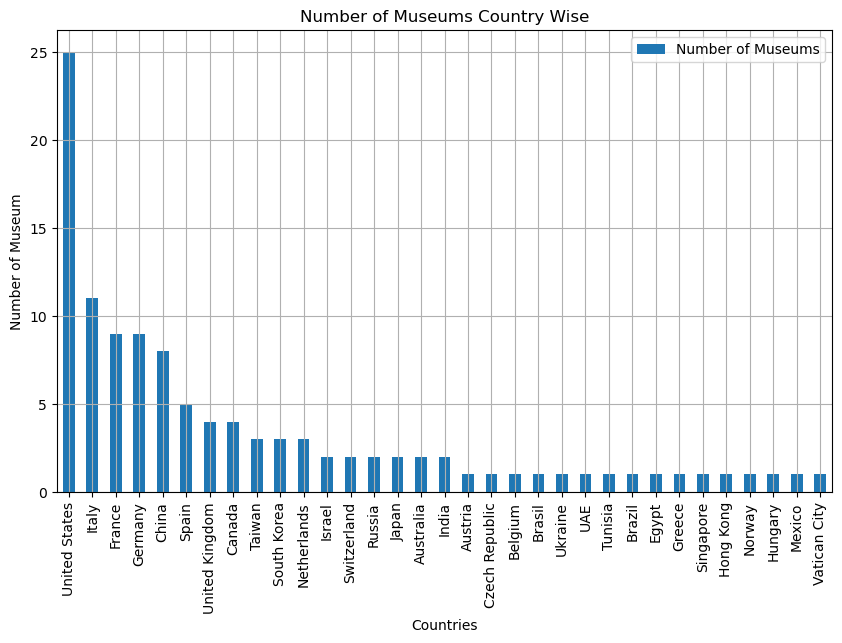

In [22]:
top_country_museum_count.plot(kind = 'bar', xlabel = 'Countries', ylabel = 'Number of Museum', title = 'Number of Museums Country Wise', grid=True,figsize=(10,6))
plt.show()

<h3> Observation 2: <h3>
<h4>Top perorming country according to number of museums is United States, Italy, France, Germany, China , Spain, United Kingdom, Canada.</h4>

<h3>Top perfomring Country : United Kingdom</h3>
<h4>United Kindom 7th in number of museum and ranked 1st in mean area.</h4>

In [23]:
top_city_museum_count = top_museums.pivot_table(index='City',values='Name',aggfunc=np.count_nonzero).sort_values('Name',ascending=False)
top_city_museum_count

,Name
City,
Paris,7
London,4
Berlin,4
Madrid,3
Milan,3
...,...
Indianapolis,1
Hyderabad,1
Houston,1


<h3> Observation 3 </h3>
<h4>Peris is top city with most number of largest museums.<h4>

In [24]:
top_city_museum_area = top_museums.pivot_table(index='City',values='Gallery space in m2',aggfunc=np.mean).sort_values('Gallery space in m2',ascending=False)
top_city_museum_area

,Gallery space in m2
City,
St. Petersburg,66842.00
Vatican City (Rome),43000.00
New York City,37110.00
London,37021.25
Mexico City,33000.00
...,...
Atlanta,8714.00
Shenyang,8500.00
Cologne,8000.00


<h3> Observation 3 </h3>
<h4>St. Petersburg  is top city with higest mean area of largest museums.<h4>

In [25]:
oldest_museums = df.sort_values('Year established')
oldest_museums.reset_index(drop = True,inplace = True)
oldest_museums

,Name,City,Country,Gallery space in sq ft,Year established,Gallery space in m2
0,Capitoline Museums,Rome,Italy,120000.0,1471,11000.0
1,Vatican Museums,Vatican City (Rome),Vatican City,460000.0,1506,43000.0
2,British Museum,London,United Kingdom,990000.0,1753,92000.0
3,Museo di Capodimonte,Naples,Italy,0.0,1757,15000.0
4,State Hermitage Museum,St. Petersburg,Russia,719480.0,1764,66842.0
...,...,...,...,...,...,...
107,"MMCA, Seoul",Seoul,South Korea,110000.0,2013,10000.0
108,National Gallery Singapore,Singapore,Singapore,190000.0,2015,18000.0
109,Louvre Abu Dhabi,Abu Dhabi,UAE,86000.0,2017,8000.0
110,Humboldt Forum,Berlin,Germany,317500.0,2020,29500.0


**Oldest and Largest Museums**

In [26]:
oldestAndLargest_museums = df.sort_values(['Year established','Gallery space in m2'],ascending = [True,False])
oldestAndLargest_museums.reset_index(drop = True, inplace = True)
oldestAndLargest_museums

,Name,City,Country,Gallery space in sq ft,Year established,Gallery space in m2
0,Capitoline Museums,Rome,Italy,120000.0,1471,11000.0
1,Vatican Museums,Vatican City (Rome),Vatican City,460000.0,1506,43000.0
2,British Museum,London,United Kingdom,990000.0,1753,92000.0
3,Museo di Capodimonte,Naples,Italy,0.0,1757,15000.0
4,State Hermitage Museum,St. Petersburg,Russia,719480.0,1764,66842.0
...,...,...,...,...,...,...
107,"MMCA, Seoul",Seoul,South Korea,110000.0,2013,10000.0
108,National Gallery Singapore,Singapore,Singapore,190000.0,2015,18000.0
109,Louvre Abu Dhabi,Abu Dhabi,UAE,86000.0,2017,8000.0
110,Humboldt Forum,Berlin,Germany,317500.0,2020,29500.0
